In [45]:
from IPython.display import display, Image, clear_output

# Comprehensive Lipidome Automation Workflow (CLAW)

Welcome to CLAW, a tool designed to facilitate and optimize the processing of lipidomic MRM data. This Jupyter notebook encapsulates a suite of tools that streamline the various stages of lipidomics data analysis.

Our toolset enables users to efficiently process MRM data files in the mzML format. Upload a file and CLAW will parse the data into a structured Pandas dataframe. This dataframe includes critical information like sample_ID, MRM transition, and signal intensity. Furthermore, our tool aligns each MRM transition with a default or custom lipid_database for accurate and swift annotation.

Moreover, CLAW is equipped with an OzESI option, a tool to elucidate the double bond location in lipid isomers. This feature allows users to input OzESI data and pinpoint the precise location of double bonds in isomeric lipids. Users have the flexibility to select which double bond locations they want to analyze. Following this, CLAW autonomously predicts potential m/z values and cross-references these predictions with sample data, ensuring a comprehensive and meticulous analysis.

With automation at its core, CLAW eliminates the need for manual data processing, significantly reducing time expenditure. It is a robust and invaluable tool for handling large volumes of lipid MRM data, accelerating scientific discovery in the field of lipidomics.

In [46]:
#Import all the necessary python libraries
import pymzml
import csv
import os
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import json

#Import all the necessary CLAW libraries
import create_directory
import CLAW

import warnings

# Suppress all warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Directory and File Management
For structured data management and efficient workflow, the system first ensures the presence of an output directory. If such a directory already exists you can skip this step.

In [47]:
# # Create the output directory. If it already exists you can skip this step.
# create_directory.create_project_folder()


The name of the project is defined next. This is important as the created directory will bear this name, allowing users to manage and identify their data with ease.

After the mzML files are uploaded to the designated mzML folder, the next block of code segregates these files based on their characteristics. More specifically, it filters the files and transfers them to respective folders named 'o3on' and 'o2only'.

In [48]:
name_of_project = 'canola2'
#After you load mzml files to mzml folder. this will filter the files and move them to o3on and o2only folders
create_directory.filter_o3mzml_files(name_of_project)

The directory 'Projects/canola2/mzml' does not exist. Please try again with a valid directory.


## Pre-Parsing Setup
The following block of code takes the preset variable values and uses them to parse the mzML files. The parsed data, including the sample ID, MRM transitions, and intensities, is stored in a pandas dataframe for easy manipulation and analysis.

The function CLAW.parsing_mzml_to_df takes several arguments. data_base_name_location is the location of the lipid database that contains information on lipid classes, fatty acid chains, and their corresponding MRM transitions. Project_Folder_data is the location of the mzML files for the samples to be analyzed. tolerance defines the acceptable range of deviation for the MRM transitions when matching them with the lipid database. The argument remove_std is a boolean that, when True, indicates to remove the MRM transitions that correspond to standards (internal or external) present in the samples.

The function outputs a pandas dataframe (df) where each row corresponds to an MRM transition detected in a sample, and columns include the sample ID, MRM transition, and intensity of the transition, among other values.

In [49]:
# Set default values
data_base_name_location = 'lipid_database/Lipid_Database.xlsx'
Project = './Projects/'
Project_Name = 'canola2'
Project_Folder_data = Project + Project_Name + '/mzml_off/'
Project_results = Project + Project_Name + '/results/'
file_name_to_save = 'CanolaOFF'
tolerance = 0.3
remove_std = True
save_data = True

# Call pre_parsing_setup to initialize the variables
data_base_name_location, Project_Folder_data, Project_results, file_name_to_save, tolerance, remove_std, save_data = CLAW.pre_parsing_setup(data_base_name_location,
 Project, 
 Project_Name, 
 Project_Folder_data,
 Project_results, 
 file_name_to_save, 
 tolerance, 
 remove_std,
 save_data)


data_base_name_location: lipid_database/Lipid_Database.xlsx
Project: ./Projects/
Project_Name: canola2
Project_Folder_data: ./Projects/canola2/mzml_off/
Project_results: ./Projects/canola2/results/
file_name_to_save: CanolaOFF
tolerance: 0.3
remove_std: True
save_data: True


Define the master dataframes where the data will be stored during the parsing step.

In [50]:
time_and_intensity_df, master_df, OzESI_time_df = CLAW.create_analysis_dataframes()

## CLAW.full_parse()
In this code, the `CLAW.full_parse()` function is used to analyze the MRM data. It takes several parameters like the location of the lipid database, paths to the data and results folders, the name of the result files, and the tolerance for MRM transitions matching. The function returns two dataframes: `df_matched` that contains information about each detected lipid species and their corresponding MRM transitions, and `OzESI_time_df` which captures data related to OzESI-MS scans, including potential double bond locations of lipids. If `remove_std` is `True`, it removes MRM transitions related to standards from the dataframe, and if `save_data` is `True`, the dataframe is saved as a .csv file in the specified results folder.

In [51]:
# Use the initialized variables as arguments to full_parse
df_MRM, df_OzESI = CLAW.full_parse(data_base_name_location, 
                                               Project_Folder_data, 
                                               Project_results, 
                                               file_name_to_save, 
                                               tolerance, 
                                               remove_std=True, 
                                               save_data=False,
                                               batch_processing=True,
                                               plot_chromatogram=False)

/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Parent_Ion'] = np.round(lipid_MRM_data['Parent_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Product_Ion'] = np.round(lipid_MRM_data['Product_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

Finished parsing mzML file: ./Projects/canola2/mzml_off/TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_020723.mzML

Finished parsing mzML file: ./Projects/canola2/mzml_off/TailoredTAG18-1_O3off_DegummedCanola0.0005mgmL_020723.mzML

Finished parsing mzML file: ./Projects/canola2/mzml_off/TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723.mzML

Finished parsing all mzML files



In [52]:
df_MRM.head(None)

Class     Intensity                        Lipid  Parent_Ion  Product_Ion  \
0     NaN  3.564149e+06                          NaN       760.6        571.6   
1     NaN  4.457442e+06                          NaN       762.6        573.6   
2     NaN  3.433913e+06                          NaN       764.6        575.6   
3     NaN  3.285521e+06                          NaN       766.7        577.6   
4     NaN  2.369992e+06                          NaN       782.6        593.6   
..    ...           ...                          ...         ...          ...   
205   TAG  3.145901e+06            [TG(54:6)]_FA18:1       896.8        597.6   
206   TAG  1.253583e+07            [TG(54:5)]_FA18:1       898.8        599.6   
207   TAG  1.422947e+07  [TG(55:11),TG(54:4)]_FA18:1       900.8        601.6   
208   TAG  3.486738e+07  [TG(55:10),TG(54:3)]_FA18:1       902.8        603.6   
209   TAG  1.285849e+07   [TG(55:9),TG(54:2)]_FA18:1       904.8        605.6   

                                             Sample_ID      Transition  
0    TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...  760.6 -> 571.6  
1    TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...  762.6 -> 573.6  
2    TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...  764.6 -> 575.6  
3    TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...  766.7 -> 577.6  
4    TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...  782.6 -> 593.6  
..                                                 ...             ...  
205   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723  896.8 -> 597.6  
206   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723  898.8 -> 599.6  
207   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723  900.8 -> 601.6  
208   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723  902.8 -> 603.6  
209   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723  904.8 -> 605.6  

[210 rows x 7 columns]

In [53]:
df_OzESI.head(None)
# df_OzESI.to_csv('FF_OzOFF_full.csv')
# df_OzESI.to_excel('FaceFatsOzdf.xlsx')

Lipid  Parent_Ion  Product_Ion  Retention_Time  OzESI_Intensity  \
0        NaN       760.6        571.6        0.015933      1127.420044   
1        NaN       760.6        571.6        0.032233      1116.780029   
2        NaN       760.6        571.6        0.048550       979.800049   
3        NaN       760.6        571.6        0.064850       804.620056   
4        NaN       760.6        571.6        0.081167       845.460083   
...      ...         ...          ...             ...              ...   
450709   NaN       904.8        605.6       34.931700       487.840027   
450710   NaN       904.8        605.6       34.948017       480.900024   
450711   NaN       904.8        605.6       34.964317       455.660034   
450712   NaN       904.8        605.6       34.980633       450.720032   
450713   NaN       904.8        605.6       34.996933       402.720032   

                                                Sample_ID      Transition  
0       TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...  760.6 -> 571.6  
1       TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...  760.6 -> 571.6  
2       TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...  760.6 -> 571.6  
3       TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...  760.6 -> 571.6  
4       TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...  760.6 -> 571.6  
...                                                   ...             ...  
450709   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723  904.8 -> 605.6  
450710   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723  904.8 -> 605.6  
450711   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723  904.8 -> 605.6  
450712   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723  904.8 -> 605.6  
450713   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723  904.8 -> 605.6  

[450714 rows x 7 columns]

The `read_mrm_list()` function is first invoked to read the MRM database from the specified file location and return it as a pandas DataFrame `mrm_database`. Subsequently, the `match_lipids_parser()` function is called to match the detected lipids from the `OzESI_time_df` DataFrame, obtained from the OzESI-MS scans, with the known lipids in the `mrm_database` based on the MRM transitions within the specified `tolerance`. The result is saved in the `df_oz_matched` DataFrame, which now contains matched lipid species from the OzESI-MS data.

In [54]:
d1 = df_OzESI.iloc[:,1:9]

d1

import pandas as pd

# Assuming d1 is your DataFrame

# Define the retention time range as a tuple (lower_bound, upper_bound)
retention_time_range = (12.7, 22.5)  # Replace with your specific range values

# Filter the DataFrame to keep only rows where Retention_Time is within the specified range
filtered_d1 = d1[(d1['Retention_Time'] >= retention_time_range[0]) & (d1['Retention_Time'] <= retention_time_range[1])]

# Now, filtered_d1 contains only the rows from d1 where Retention_Time is within the specified range

filtered_d1

Parent_Ion  Product_Ion  Retention_Time  OzESI_Intensity  \
778          760.6        571.6       12.703500      1671.480103   
779          760.6        571.6       12.719817      1501.800049   
780          760.6        571.6       12.736117      1649.320068   
781          760.6        571.6       12.752417      1705.340088   
782          760.6        571.6       12.768733      1844.280151   
...            ...          ...             ...              ...   
449942       904.8        605.6       22.423517     12301.480469   
449943       904.8        605.6       22.439817     12025.701172   
449944       904.8        605.6       22.456117     13028.401367   
449945       904.8        605.6       22.472433     12913.661133   
449946       904.8        605.6       22.488733     12854.741211   

                                                Sample_ID      Transition  
778     TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...  760.6 -> 571.6  
779     TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...  760.6 -> 571.6  
780     TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...  760.6 -> 571.6  
781     TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...  760.6 -> 571.6  
782     TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...  760.6 -> 571.6  
...                                                   ...             ...  
449942   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723  904.8 -> 605.6  
449943   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723  904.8 -> 605.6  
449944   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723  904.8 -> 605.6  
449945   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723  904.8 -> 605.6  
449946   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723  904.8 -> 605.6  

[126198 rows x 6 columns]

In [55]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Assuming clustered_data is your DataFrame with the necessary data

# # Plotting the Intensity vs Retention Time
# plt.figure(figsize=(10, 6))
# plt.scatter(filtered_d1['Retention_Time'], filtered_d1['OzESI_Intensity'])

# # Adding labels and title to the plot
# plt.xlabel('Retention Time')
# plt.ylabel('OzESI Intensity')
# plt.title('Retention Time vs OzESI Intensity')

# # Displaying the plot
# plt.show()


DBSCAN
CLUSTER DATA

ALL SAMPLES CLustering

In [56]:
import pandas as pd
from sklearn.cluster import DBSCAN

# Assuming filtered_d1 is your DataFrame
clustered_data = pd.DataFrame()  # Initialize an empty DataFrame to store clustered results

# Iterate over each group of Parent_Ion and Product_Ion
for (parent_ion, product_ion), group in filtered_d1.groupby(['Parent_Ion', 'Product_Ion']):
    # Calculate 1% below the maximum 'OzESI_Intensity'
    max_intensity = group['OzESI_Intensity'].max()
    cutoff_intensity = max_intensity * 0.005

    # Apply the filters
    filtered_group = group[(group['OzESI_Intensity'] >= cutoff_intensity) & (group['OzESI_Intensity'] > 50)]

    # Check if the filtered group is empty, skip to the next iteration if so
    if filtered_group.empty:
        continue

    # Reshape the 'Retention_Time' data for DBSCAN
    retention_times = filtered_group[['Retention_Time']].values

    # Apply DBSCAN clustering to this specific ion pair group
    dbscan = DBSCAN(eps=0.10, min_samples=20).fit(retention_times)

    # Get the cluster labels
    labels = dbscan.labels_

    # Add the cluster labels to the filtered group
    filtered_group['Cluster_Label'] = labels

    # Append the clustered group to the results DataFrame
    clustered_data = pd.concat([clustered_data, filtered_group])

# The resulting DataFrame, clustered_data, now contains separately clustered data for each ion pair
clustered_data


/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Parent_Ion  Product_Ion  Retention_Time  OzESI_Intensity  \
778          760.6        571.6       12.703500      1671.480103   
779          760.6        571.6       12.719817      1501.800049   
780          760.6        571.6       12.736117      1649.320068   
781          760.6        571.6       12.752417      1705.340088   
782          760.6        571.6       12.768733      1844.280151   
...            ...          ...             ...              ...   
449942       904.8        605.6       22.423517     12301.480469   
449943       904.8        605.6       22.439817     12025.701172   
449944       904.8        605.6       22.456117     13028.401367   
449945       904.8        605.6       22.472433     12913.661133   
449946       904.8        605.6       22.488733     12854.741211   

                                                Sample_ID      Transition  \
778     TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...  760.6 -> 571.6   
779     TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...  760.6 -> 571.6   
780     TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...  760.6 -> 571.6   
781     TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...  760.6 -> 571.6   
782     TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...  760.6 -> 571.6   
...                                                   ...             ...   
449942   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723  904.8 -> 605.6   
449943   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723  904.8 -> 605.6   
449944   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723  904.8 -> 605.6   
449945   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723  904.8 -> 605.6   
449946   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723  904.8 -> 605.6   

        Cluster_Label  
778                 0  
779                 0  
780                 0  
781                 0  
782                 0  
...               ...  
449942              0  
449943              0  
449944              0  
449945              0  
449946              0  

[124984 rows x 7 columns]

Group data by transition

In [57]:
#group cluster data by sample ID Parent and Product Ion
grouped_cluster_data = clustered_data.groupby(['Parent_Ion', 'Product_Ion'])
#add group number to each to a new column called Group
clustered_data['Group'] = grouped_cluster_data.ngroup()
clustered_data

Parent_Ion  Product_Ion  Retention_Time  OzESI_Intensity  \
778          760.6        571.6       12.703500      1671.480103   
779          760.6        571.6       12.719817      1501.800049   
780          760.6        571.6       12.736117      1649.320068   
781          760.6        571.6       12.752417      1705.340088   
782          760.6        571.6       12.768733      1844.280151   
...            ...          ...             ...              ...   
449942       904.8        605.6       22.423517     12301.480469   
449943       904.8        605.6       22.439817     12025.701172   
449944       904.8        605.6       22.456117     13028.401367   
449945       904.8        605.6       22.472433     12913.661133   
449946       904.8        605.6       22.488733     12854.741211   

                                                Sample_ID      Transition  \
778     TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...  760.6 -> 571.6   
779     TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...  760.6 -> 571.6   
780     TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...  760.6 -> 571.6   
781     TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...  760.6 -> 571.6   
782     TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...  760.6 -> 571.6   
...                                                   ...             ...   
449942   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723  904.8 -> 605.6   
449943   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723  904.8 -> 605.6   
449944   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723  904.8 -> 605.6   
449945   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723  904.8 -> 605.6   
449946   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723  904.8 -> 605.6   

        Cluster_Label  Group  
778                 0      0  
779                 0      0  
780                 0      0  
781                 0      0  
782                 0      0  
...               ...    ...  
449942              0     33  
449943              0     33  
449944              0     33  
449945              0     33  
449946              0     33  

[124984 rows x 8 columns]

Plot clustered data if need to validate

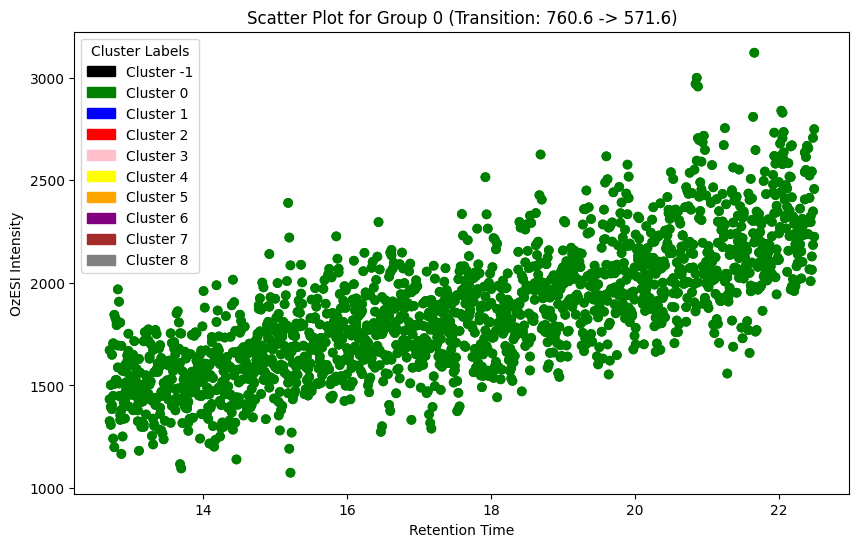

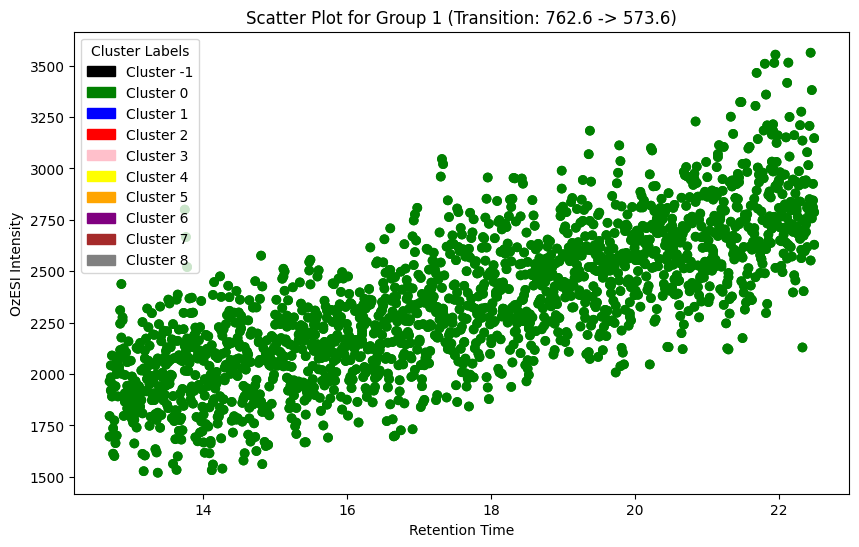

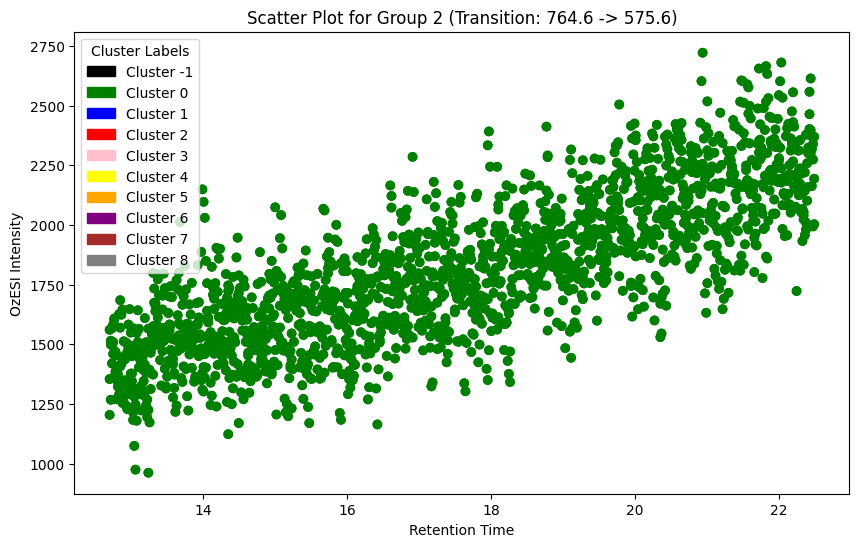

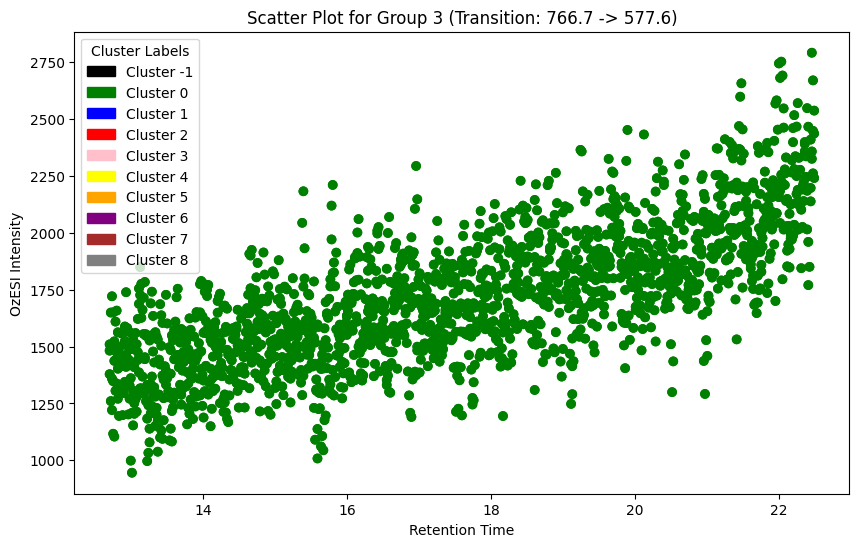

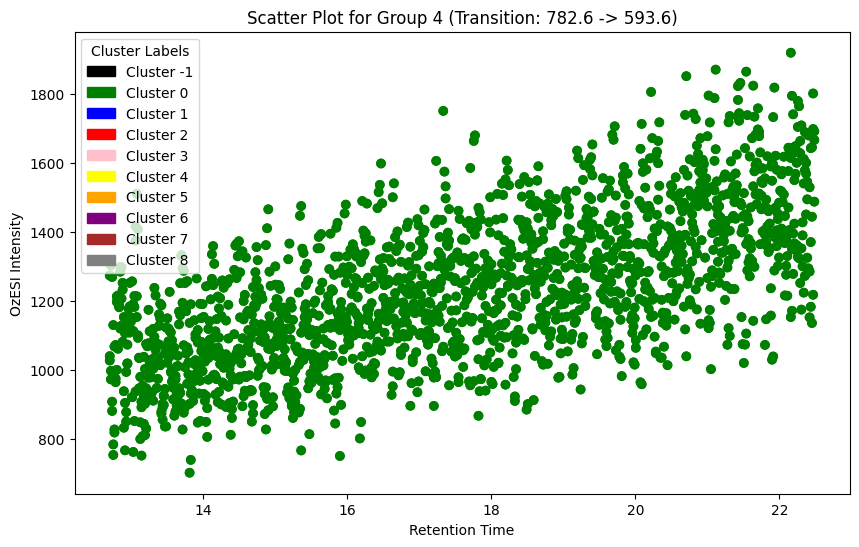

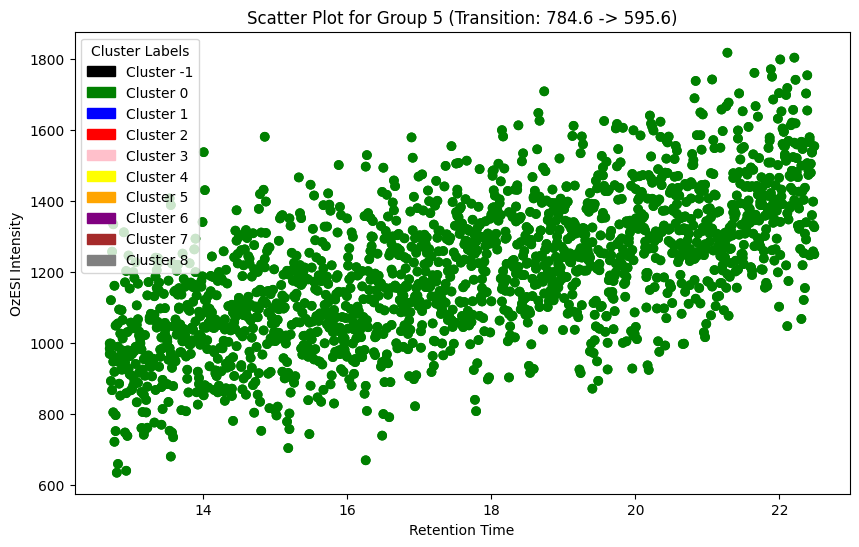

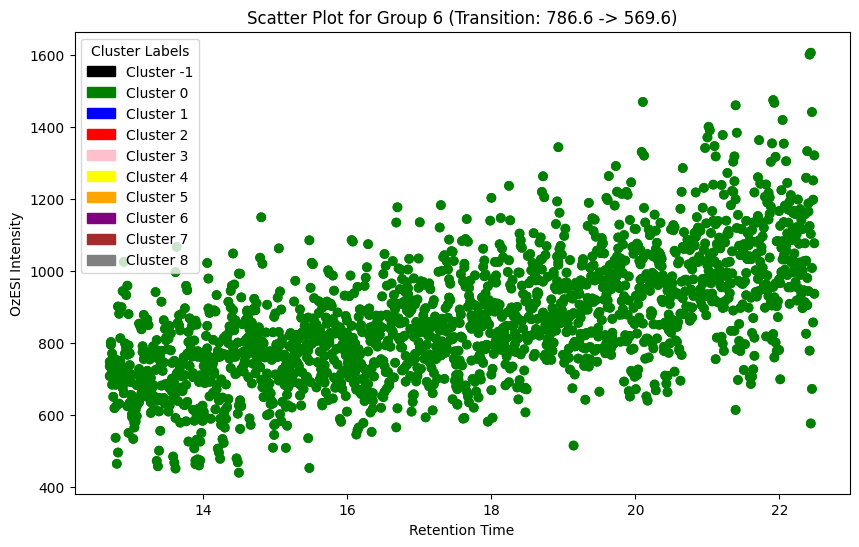

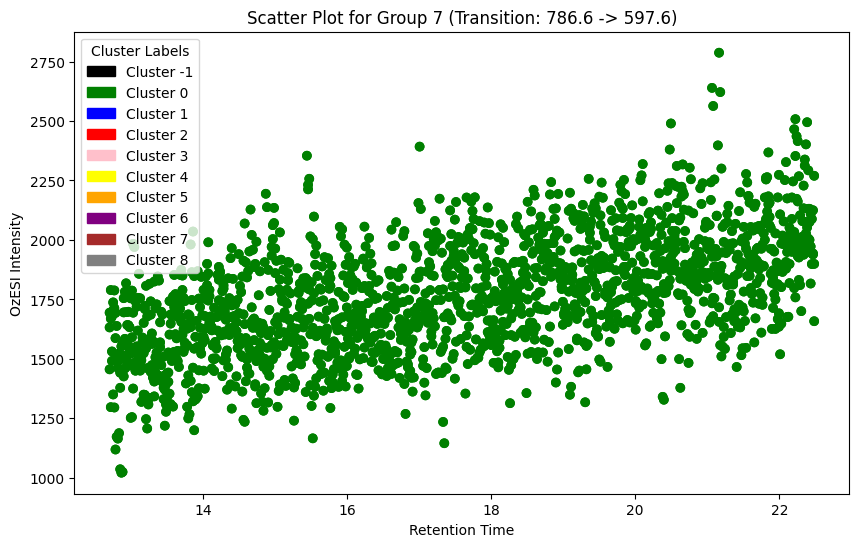

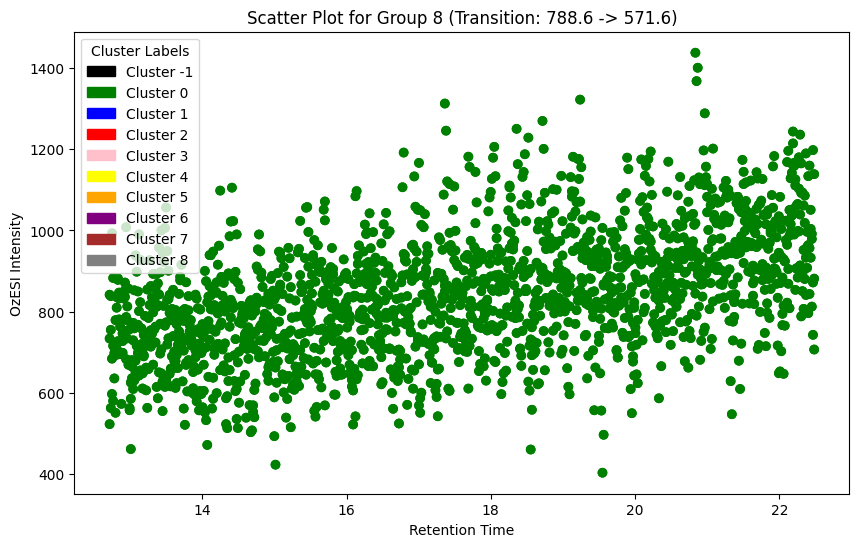

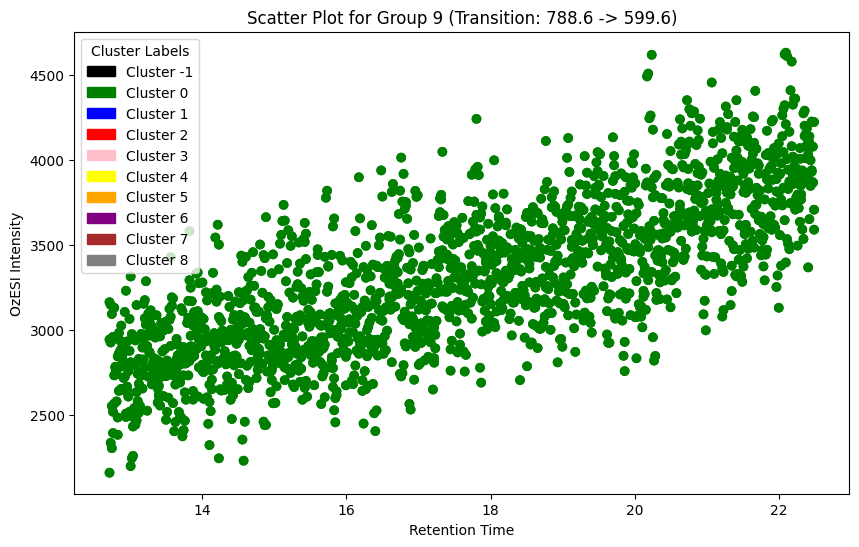

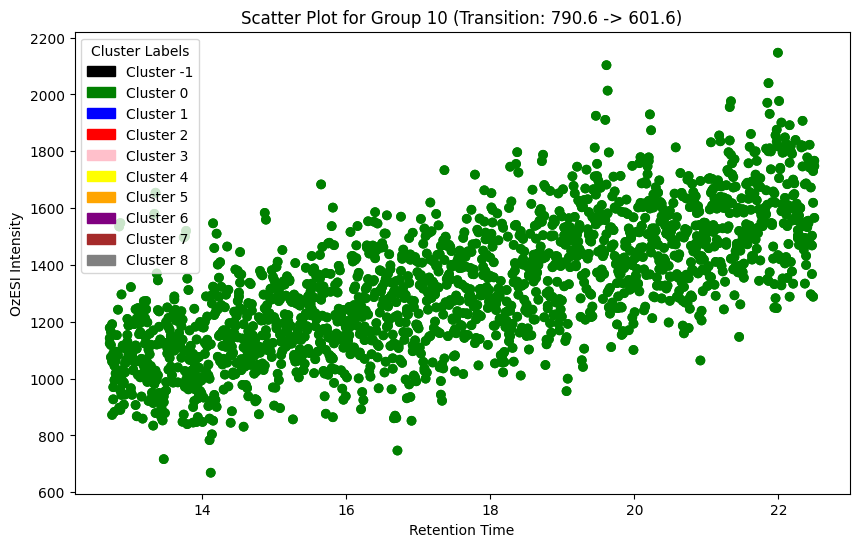

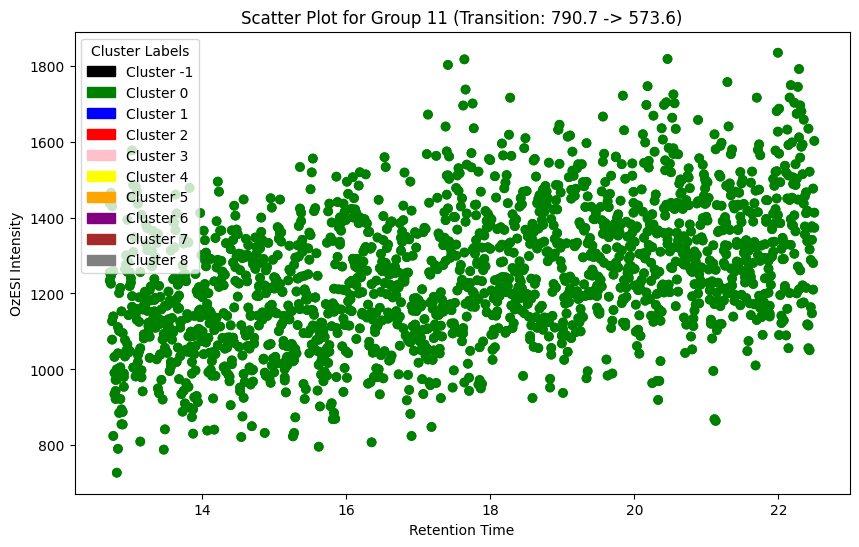

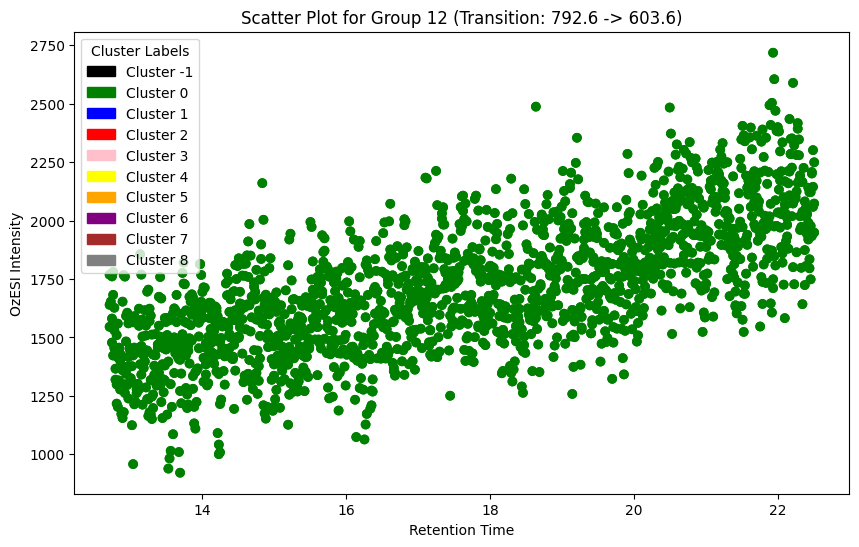

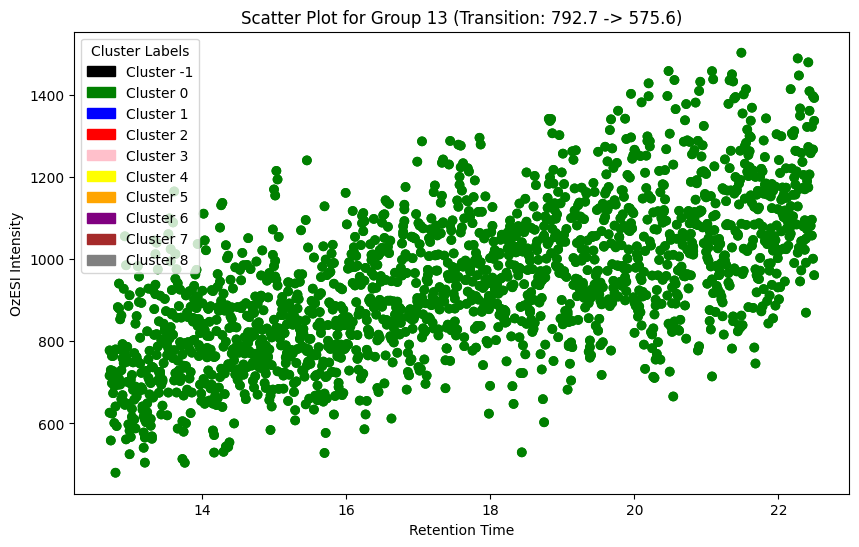

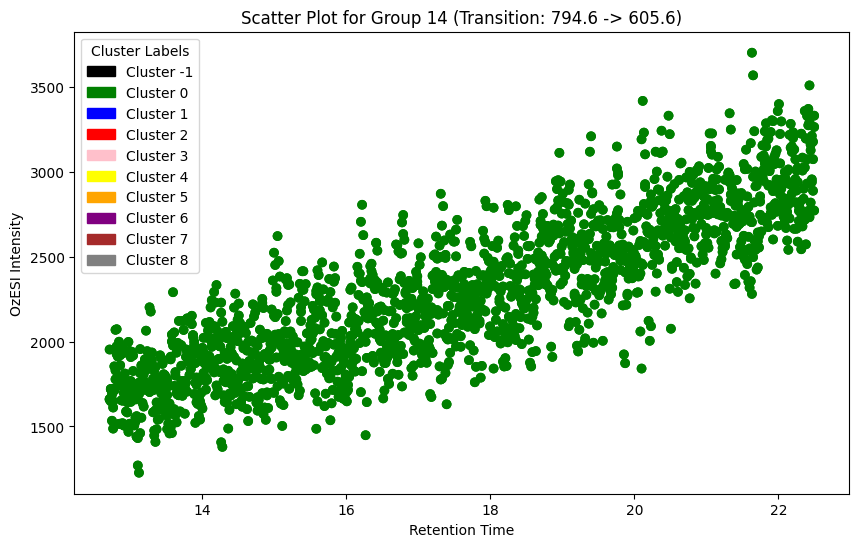

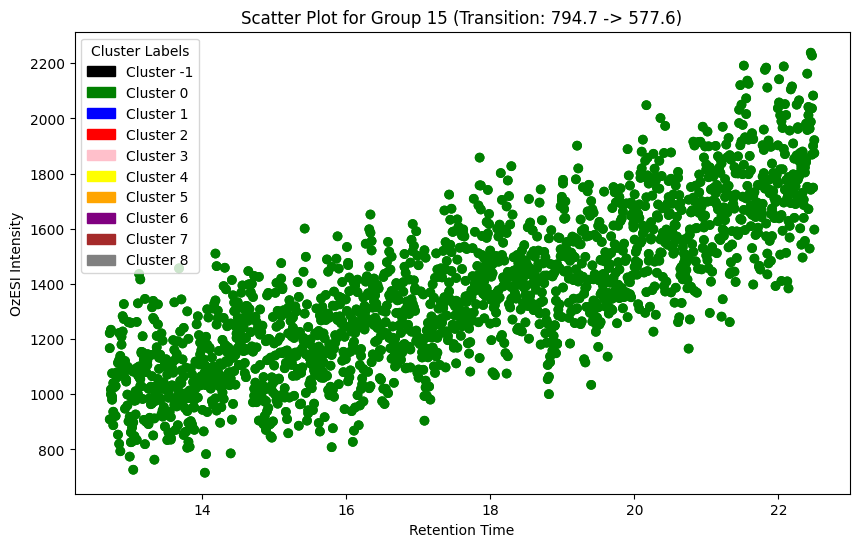

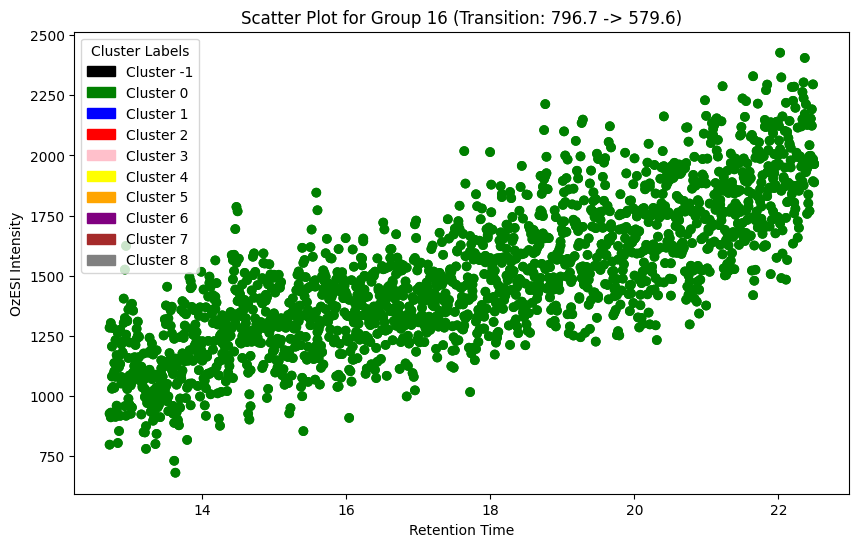

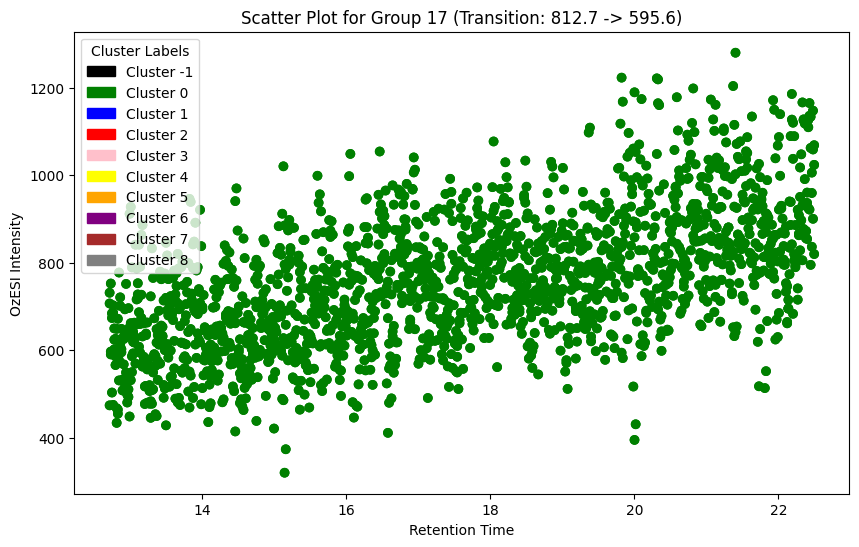

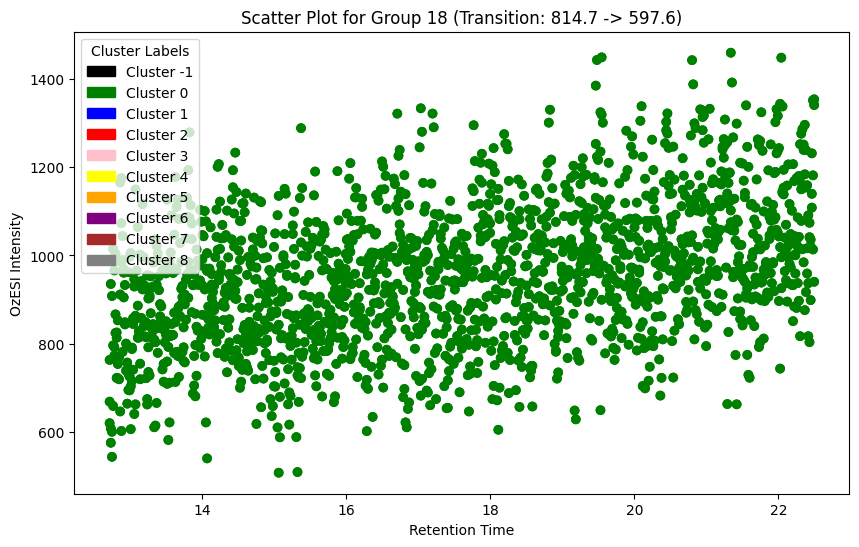

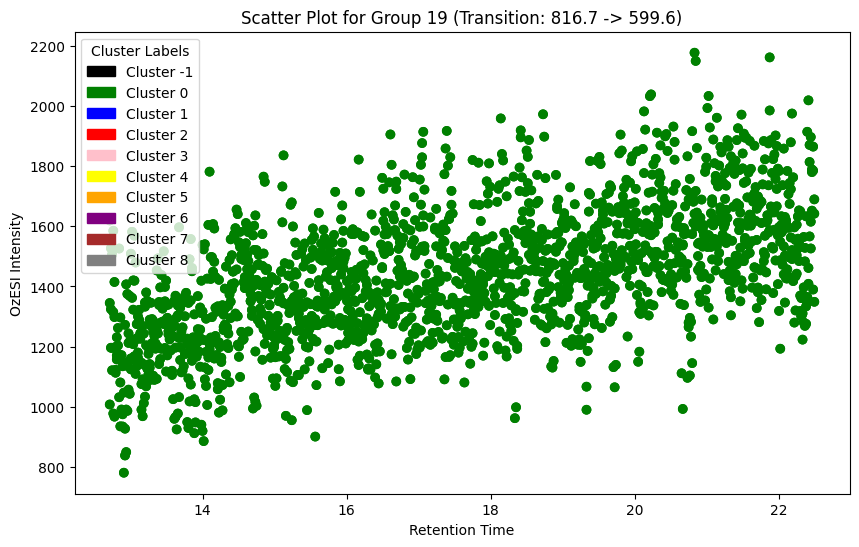

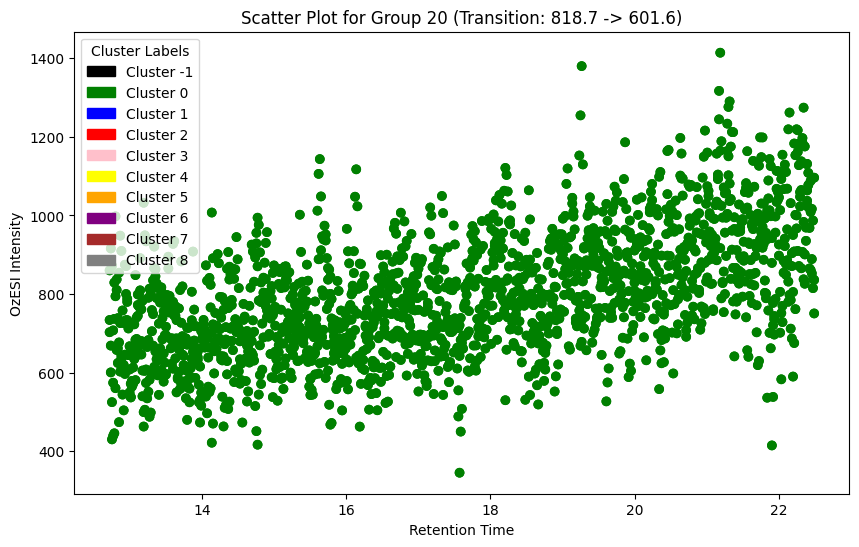

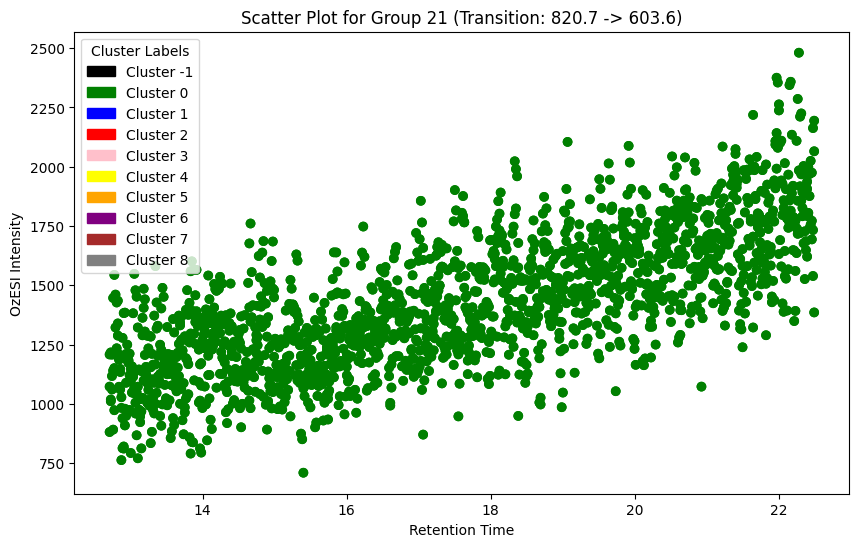

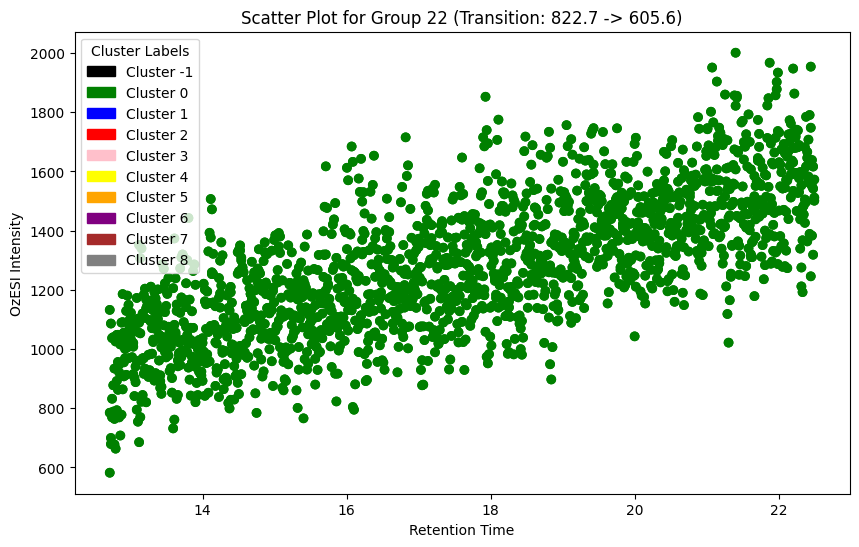

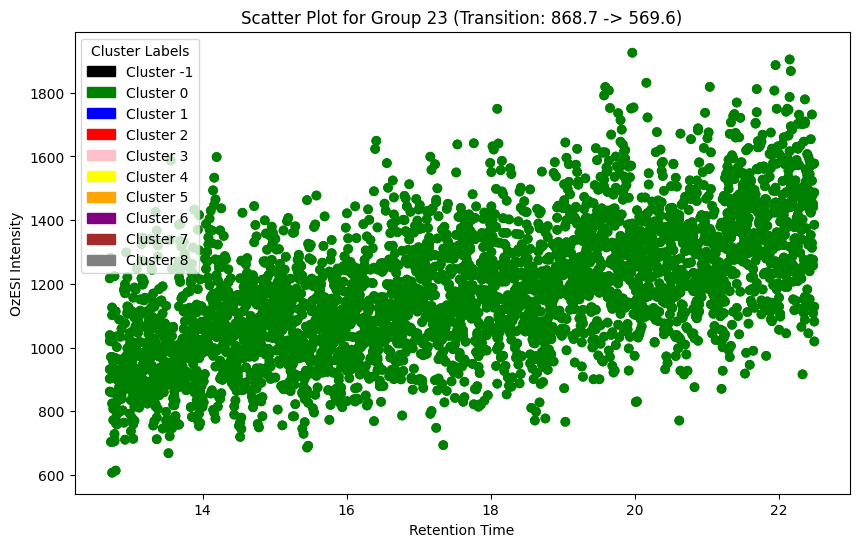

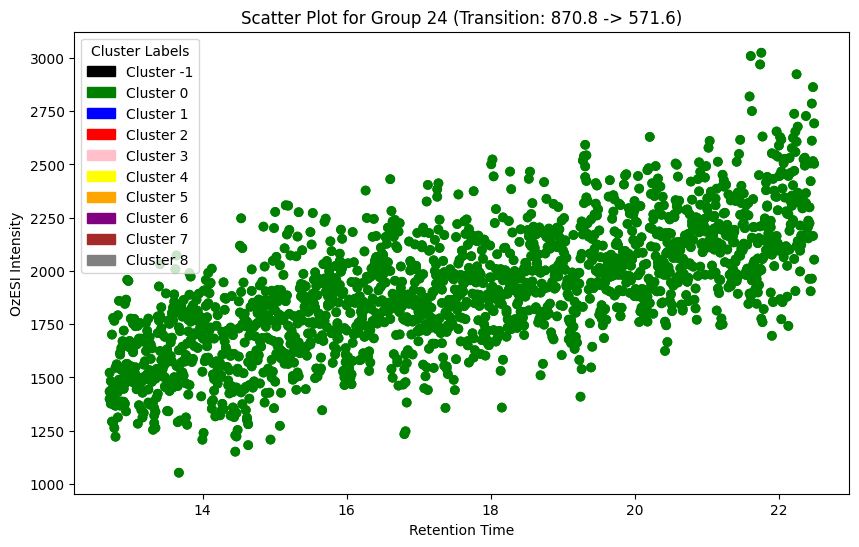

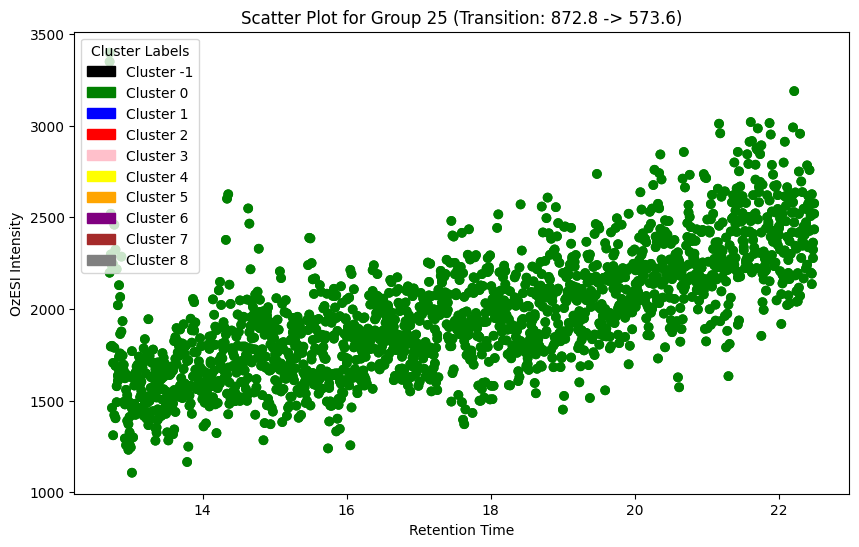

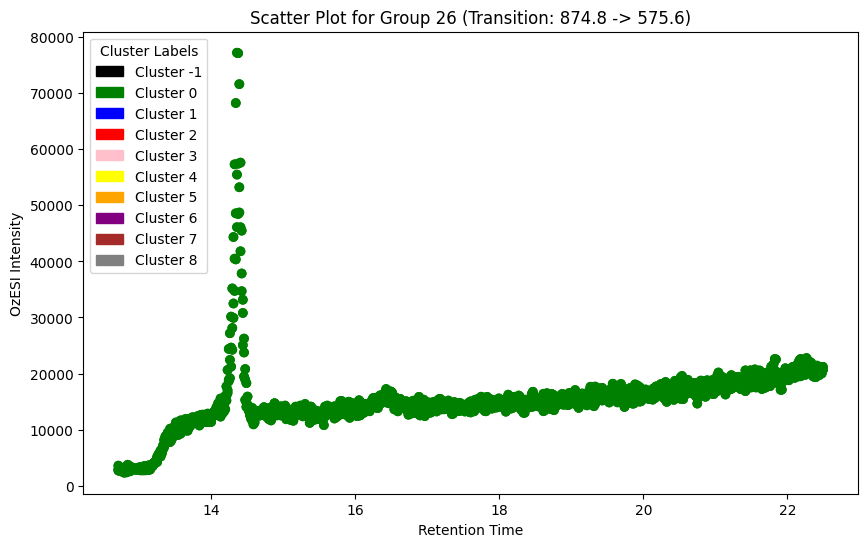

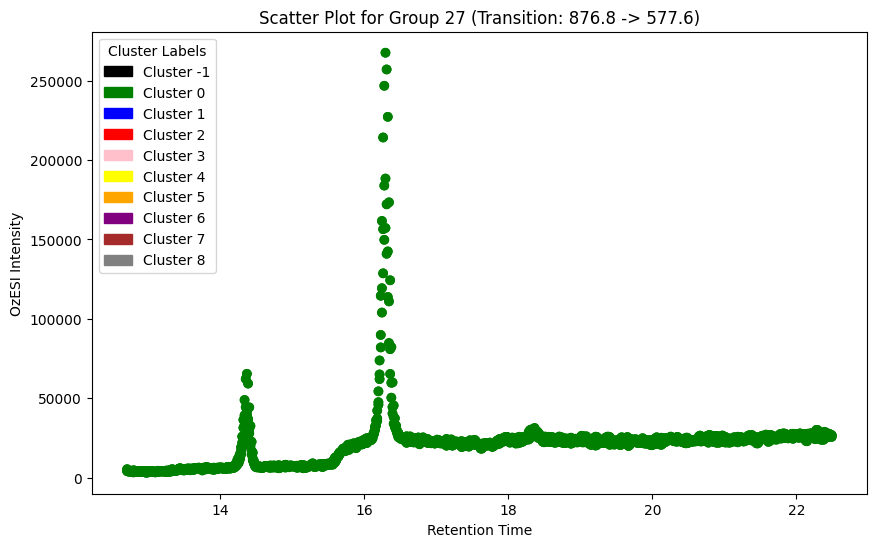

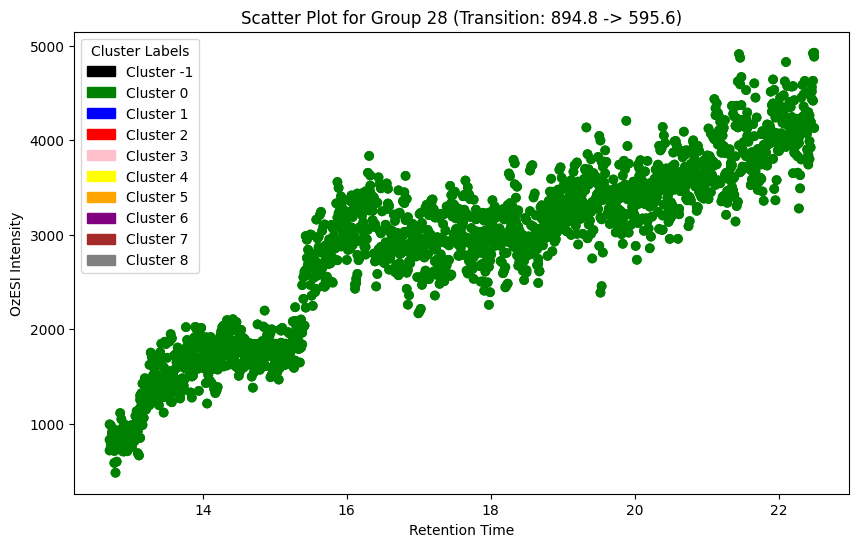

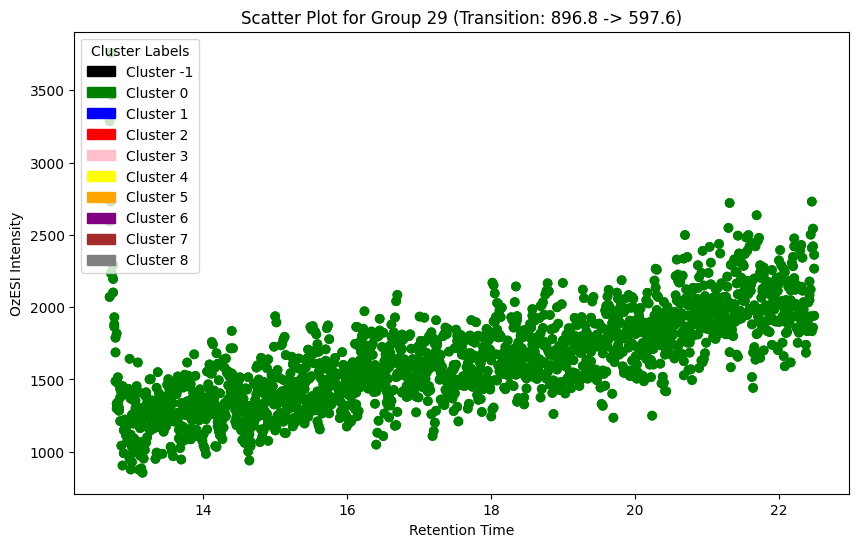

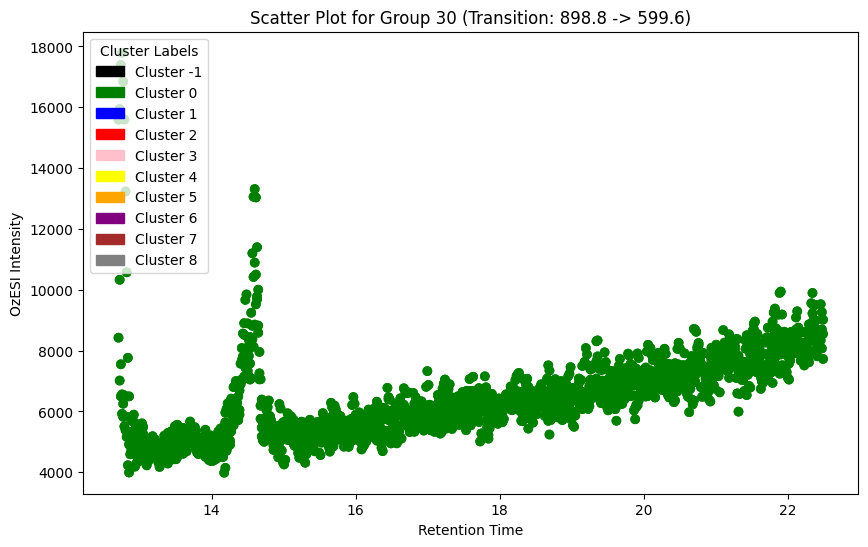

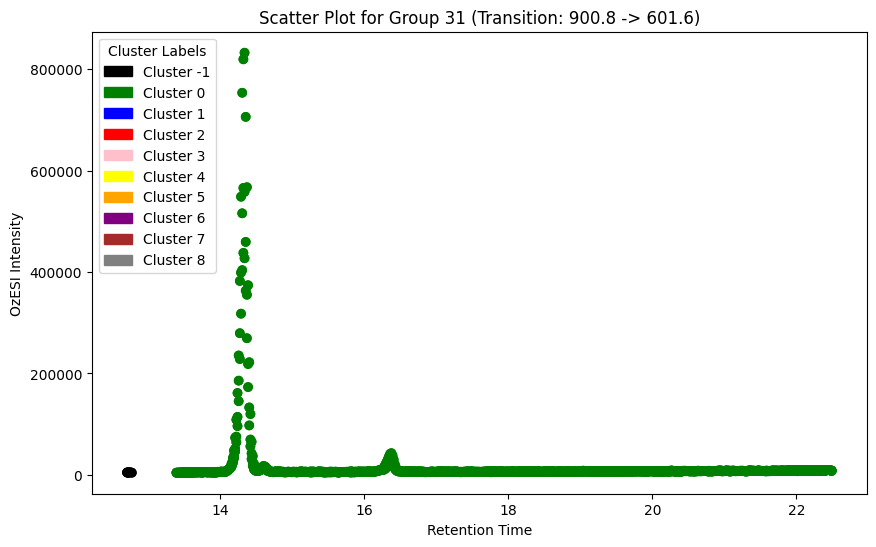

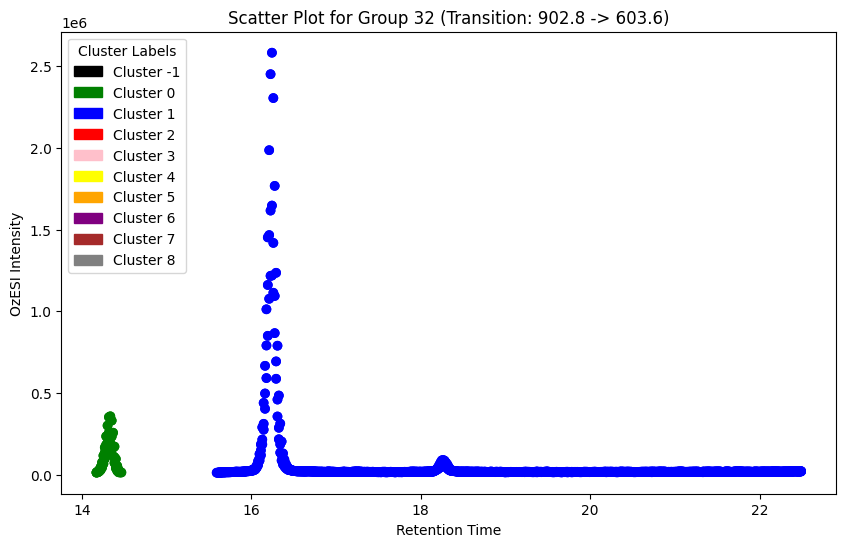

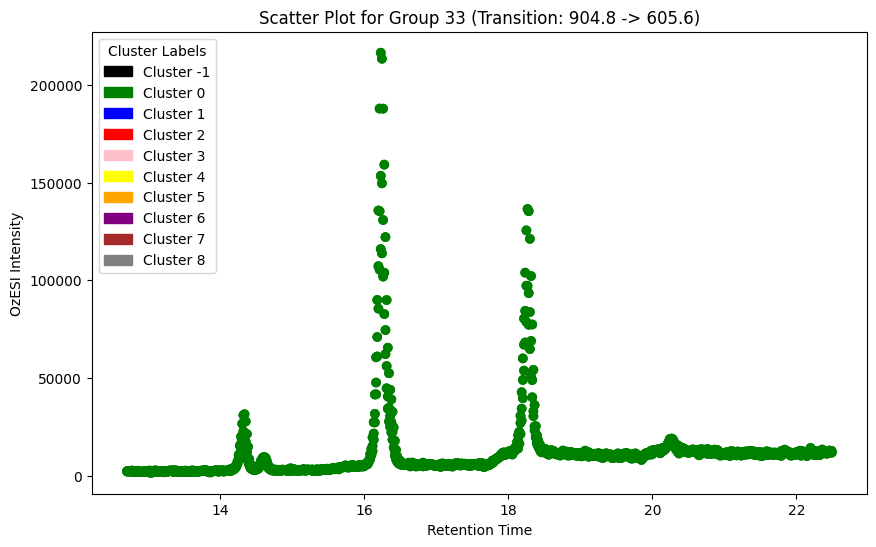

In [58]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

# save_dir = 'Projects/canola2/plots/validation/'
# Assuming clustered_data is your DataFrame with the necessary columns

# Define custom colors for the clusters
color_map = {-1: 'black', 0: 'green', 1: 'blue', 2: 'red', 3: 'pink', 4: 'yellow', 5: 'orange', 6: 'purple', 7: 'brown', 8: 'gray'}

# Get unique Group values
unique_groups = clustered_data['Group'].unique()

# Iterate through each unique group
for group in unique_groups:
    # Filter the data for each Group
    group_filtered_data = clustered_data[clustered_data['Group'] == group]
    #colors = group_filtered_data['Cluster_Label'].map(color_map)
    colors = group_filtered_data['Cluster_Label'].map(color_map).fillna('grey')

    # Extract the corresponding Transition value for the group
    # Assuming that all rows in a group have the same Transition value
    transition_value = group_filtered_data['Transition'].iloc[0]

    # Set up the plot for each group
    plt.figure(figsize=(10, 6))
    plt.scatter(group_filtered_data['Retention_Time'], group_filtered_data['OzESI_Intensity'], color=colors)

    # Add labels and title
    plt.xlabel('Retention Time')
    plt.ylabel('OzESI Intensity')
    plt.title(f'Scatter Plot for Group {group} (Transition: {transition_value})')

    # Create a legend for the plot
    patch_list = [mpatches.Patch(color=color, label=f'Cluster {label}') for label, color in color_map.items()]
    plt.legend(handles=patch_list, loc='upper left', title='Cluster Labels')
    
    # Save the plot as a PNG file in the specified directory
    filename = f'Group_{group}_Transition_{transition_value}.png'
    # plt.savefig(os.path.join(save_dir, filename), bbox_inches='tight')


    # Show the plot
    plt.show()



Max intesnity mean RT

In [59]:
import pandas as pd

# Assuming clustered_data is your original DataFrame

# Calculate the max OzESI_Intensity for each Group and Cluster_Label
# directly within the DataFrame
clustered_data['Max_OzESI_Intensity'] = clustered_data.groupby(['Group', 'Cluster_Label'])['OzESI_Intensity'].transform('max')

# Step 2: Identify the cluster with the highest Max_OzESI_Intensity for each Group
group_max_cluster = clustered_data.groupby('Group')['Max_OzESI_Intensity'].idxmax()

# Step 3: Create a DataFrame with only those rows that belong to the identified clusters
filtered_data = clustered_data.loc[group_max_cluster]

#change this code below

# Calculate the average Retention_Time for each Parent_Ion and Product_Ion
# directly within the DataFrame
filtered_data['Average_Retention_Time'] = filtered_data.groupby(['Parent_Ion', 'Product_Ion'])['Retention_Time'].transform('mean')

# Filtering out rows where 'Cluster_Label' is -1
filtered_df = clustered_data[clustered_data['Cluster_Label'] != -1]

filtered_df


Parent_Ion  Product_Ion  Retention_Time  OzESI_Intensity  \
778          760.6        571.6       12.703500      1671.480103   
779          760.6        571.6       12.719817      1501.800049   
780          760.6        571.6       12.736117      1649.320068   
781          760.6        571.6       12.752417      1705.340088   
782          760.6        571.6       12.768733      1844.280151   
...            ...          ...             ...              ...   
449942       904.8        605.6       22.423517     12301.480469   
449943       904.8        605.6       22.439817     12025.701172   
449944       904.8        605.6       22.456117     13028.401367   
449945       904.8        605.6       22.472433     12913.661133   
449946       904.8        605.6       22.488733     12854.741211   

                                                Sample_ID      Transition  \
778     TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...  760.6 -> 571.6   
779     TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...  760.6 -> 571.6   
780     TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...  760.6 -> 571.6   
781     TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...  760.6 -> 571.6   
782     TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...  760.6 -> 571.6   
...                                                   ...             ...   
449942   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723  904.8 -> 605.6   
449943   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723  904.8 -> 605.6   
449944   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723  904.8 -> 605.6   
449945   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723  904.8 -> 605.6   
449946   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723  904.8 -> 605.6   

        Cluster_Label  Group  Max_OzESI_Intensity  
778                 0      0          3121.700195  
779                 0      0          3121.700195  
780                 0      0          3121.700195  
781                 0      0          3121.700195  
782                 0      0          3121.700195  
...               ...    ...                  ...  
449942              0     33        216351.718750  
449943              0     33        216351.718750  
449944              0     33        216351.718750  
449945              0     33        216351.718750  
449946              0     33        216351.718750  

[124970 rows x 9 columns]

In [60]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Assuming clustered_data is your DataFrame with the necessary data

# # Plotting the Intensity vs Retention Time
# plt.figure(figsize=(10, 6))
# plt.scatter(filtered_d1['Retention_Time'], filtered_d1['OzESI_Intensity'])

# # Adding labels and title to the plot
# plt.xlabel('Retention Time')
# plt.ylabel('OzESI Intensity')
# plt.title('Retention Time vs OzESI Intensity')

# # Displaying the plot
# plt.show()


Choose Cluster with correct RT

In [61]:
# # Assuming filtered_df is your DataFrame

# # Step 1: Identify the combination with the highest Max_OzESI_Intensity for each Group
# group_max_intensity_combination = filtered_df.groupby('Group').apply(lambda x: x.loc[x['Max_OzESI_Intensity'].idxmax()])
# print('group max:', group_max_intensity_combination)
# # Identify which Cluster_Label this belongs to
# group_to_cluster = group_max_intensity_combination.set_index('Group')['Cluster_Label'].to_dict()
# print('group to cluseter:',group_to_cluster)

# # Step 2: Drop other Cluster_Labels from the df for that specific group
# filtered_df = filtered_df[filtered_df.apply(lambda x: x['Cluster_Label'] == group_to_cluster[x['Group']], axis=1)]

# filtered_df

Filter max intesnity for Sample_ID group

In [62]:
import pandas as pd

# Assuming your DataFrame is named df

# Group by 'Sample_ID' and 'Group', and find the row with the highest 'OzESI_Intensity' for each group
filtered_df2= filtered_df.groupby(['Sample_ID', 'Group']).apply(lambda x: x.loc[x['OzESI_Intensity'].idxmax()]).reset_index(drop=True)

filtered_df2


Parent_Ion  Product_Ion  Retention_Time  OzESI_Intensity  \
0         760.6        571.6       21.248867     2.754460e+03   
1         762.6        573.6       22.438883     3.563180e+03   
2         764.6        575.6       22.438417     2.614380e+03   
3         766.7        577.6       22.389033     2.547120e+03   
4         782.6        593.6       21.426383     1.821660e+03   
..          ...          ...             ...              ...   
97        896.8        597.6       12.722167     2.730800e+03   
98        898.8        599.6       12.754300     1.779346e+04   
99        900.8        601.6       14.319400     5.658364e+05   
100       902.8        603.6       16.243267     1.646316e+06   
101       904.8        605.6       16.226483     1.534357e+05   

                                             Sample_ID      Transition  \
0    TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...  760.6 -> 571.6   
1    TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...  762.6 -> 573.6   
2    TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...  764.6 -> 575.6   
3    TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...  766.7 -> 577.6   
4    TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...  782.6 -> 593.6   
..                                                 ...             ...   
97    TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723  896.8 -> 597.6   
98    TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723  898.8 -> 599.6   
99    TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723  900.8 -> 601.6   
100   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723  902.8 -> 603.6   
101   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723  904.8 -> 605.6   

     Cluster_Label  Group  Max_OzESI_Intensity  
0                0      0         3.121700e+03  
1                0      1         3.563180e+03  
2                0      2         2.722240e+03  
3                0      3         2.790500e+03  
4                0      4         1.918220e+03  
..             ...    ...                  ...  
97               0     29         3.759800e+03  
98               0     30         1.779346e+04  
99               0     31         8.326169e+05  
100              1     32         2.580698e+06  
101              0     33         2.163517e+05  

[102 rows x 9 columns]

match lipids to this df

In [63]:
mrm_database = CLAW.read_mrm_list(data_base_name_location, deuterated=False)
matched_df = CLAW.match_lipids_parser(mrm_database, filtered_df2, tolerance=0.3)
#retention time column round to 2 decimal places
matched_df['Retention_Time'] = matched_df['Retention_Time'].round(2)
matched_df

/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Parent_Ion'] = np.round(lipid_MRM_data['Parent_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Product_Ion'] = np.round(lipid_MRM_data['Product_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

Class  Cluster_Label  Group                        Lipid  \
0     NaN              0      0                          NaN   
1     NaN              0      1                          NaN   
2     NaN              0      2                          NaN   
3     NaN              0      3                          NaN   
4     NaN              0      4                          NaN   
..    ...            ...    ...                          ...   
97    TAG              0     29            [TG(54:6)]_FA18:1   
98    TAG              0     30            [TG(54:5)]_FA18:1   
99    TAG              0     31  [TG(55:11),TG(54:4)]_FA18:1   
100   TAG              1     32  [TG(55:10),TG(54:3)]_FA18:1   
101   TAG              0     33   [TG(55:9),TG(54:2)]_FA18:1   

     Max_OzESI_Intensity  OzESI_Intensity  Parent_Ion  Product_Ion  \
0           3.121700e+03     2.754460e+03       760.6        571.6   
1           3.563180e+03     3.563180e+03       762.6        573.6   
2           2.722240e+03     2.614380e+03       764.6        575.6   
3           2.790500e+03     2.547120e+03       766.7        577.6   
4           1.918220e+03     1.821660e+03       782.6        593.6   
..                   ...              ...         ...          ...   
97          3.759800e+03     2.730800e+03       896.8        597.6   
98          1.779346e+04     1.779346e+04       898.8        599.6   
99          8.326169e+05     5.658364e+05       900.8        601.6   
100         2.580698e+06     1.646316e+06       902.8        603.6   
101         2.163517e+05     1.534357e+05       904.8        605.6   

     Retention_Time                                          Sample_ID  \
0             21.25  TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...   
1             22.44  TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...   
2             22.44  TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...   
3             22.39  TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...   
4             21.43  TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...   
..              ...                                                ...   
97            12.72   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723   
98            12.75   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723   
99            14.32   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723   
100           16.24   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723   
101           16.23   TailoredTAG18-1_O3off_RBDCanola0.0005mgmL_020723   

         Transition  
0    760.6 -> 571.6  
1    762.6 -> 573.6  
2    764.6 -> 575.6  
3    766.7 -> 577.6  
4    782.6 -> 593.6  
..              ...  
97   896.8 -> 597.6  
98   898.8 -> 599.6  
99   900.8 -> 601.6  
100  902.8 -> 603.6  
101  904.8 -> 605.6  

[102 rows x 11 columns]

Print out Lipid RTs for validation

In [64]:
import pandas as pd

# Assuming your DataFrame is named df

# Filter the DataFrame to keep only unique lipids
unique_lipids_df = matched_df.drop_duplicates(subset=['Lipid'])
sorted_unique_lipids_df = unique_lipids_df.sort_values(by=['Lipid'])
sorted_unique_lipids_df.head(50)
# Now, unique_lipids_df contains only rows with unique values in the 'Lipid' column

print(len(sorted_unique_lipids_df))
# Loop through the DataFrame and print 'Lipid' and 'Retention_Time'
for index, row in sorted_unique_lipids_df.iterrows():
    print(f"Lipid: {row['Lipid']}, Retention Time: {row['Retention_Time']}")

#save this to a csv file with only the two columns Lipid and Retention Time

sorted_unique_lipids_df


12
Lipid: [TG(52:4)]_FA18:1, Retention Time: 12.71
Lipid: [TG(52:5)]_FA18:1, Retention Time: 22.22
Lipid: [TG(52:6)]_FA18:1, Retention Time: 21.04
Lipid: [TG(53:10),TG(52:3)]_FA18:1, Retention Time: 14.35
Lipid: [TG(53:9),TG(52:2)]_FA18:1, Retention Time: 16.29
Lipid: [TG(54:5)]_FA18:1, Retention Time: 12.71
Lipid: [TG(54:6)]_FA18:1, Retention Time: 12.72
Lipid: [TG(54:7),TG(53:0)]_FA18:1, Retention Time: 22.47
Lipid: [TG(55:10),TG(54:3)]_FA18:1, Retention Time: 16.24
Lipid: [TG(55:11),TG(54:4)]_FA18:1, Retention Time: 14.34
Lipid: [TG(55:9),TG(54:2)]_FA18:1, Retention Time: 16.23
Lipid: nan, Retention Time: 21.25


Class  Cluster_Label  Group                        Lipid  \
25   TAG              0     25            [TG(52:4)]_FA18:1   
24   TAG              0     24            [TG(52:5)]_FA18:1   
23   TAG              0     23            [TG(52:6)]_FA18:1   
26   TAG              0     26  [TG(53:10),TG(52:3)]_FA18:1   
27   TAG              0     27   [TG(53:9),TG(52:2)]_FA18:1   
30   TAG              0     30            [TG(54:5)]_FA18:1   
29   TAG              0     29            [TG(54:6)]_FA18:1   
28   TAG              0     28   [TG(54:7),TG(53:0)]_FA18:1   
32   TAG              1     32  [TG(55:10),TG(54:3)]_FA18:1   
31   TAG              0     31  [TG(55:11),TG(54:4)]_FA18:1   
33   TAG              0     33   [TG(55:9),TG(54:2)]_FA18:1   
0    NaN              0      0                          NaN   

    Max_OzESI_Intensity  OzESI_Intensity  Parent_Ion  Product_Ion  \
25         3.398860e+03     3.349820e+03       872.8        573.6   
24         3.024260e+03     2.737620e+03       870.8        571.6   
23         1.925720e+03     1.818660e+03       868.7        569.6   
26         7.724152e+04     7.724152e+04       874.8        575.6   
27         2.675253e+05     2.675253e+05       876.8        577.6   
30         1.779346e+04     1.579634e+04       898.8        599.6   
29         3.759800e+03     3.759800e+03       896.8        597.6   
28         4.926780e+03     4.920601e+03       894.8        595.6   
32         2.580698e+06     2.580698e+06       902.8        603.6   
31         8.326169e+05     8.326169e+05       900.8        601.6   
33         2.163517e+05     2.163517e+05       904.8        605.6   
0          3.121700e+03     2.754460e+03       760.6        571.6   

    Retention_Time                                          Sample_ID  \
25           12.71  TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...   
24           22.22  TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...   
23           21.04  TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...   
26           14.35  TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...   
27           16.29  TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...   
30           12.71  TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...   
29           12.72  TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...   
28           22.47  TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...   
32           16.24  TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...   
31           14.34  TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...   
33           16.23  TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...   
0            21.25  TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...   

        Transition  
25  872.8 -> 573.6  
24  870.8 -> 571.6  
23  868.7 -> 569.6  
26  874.8 -> 575.6  
27  876.8 -> 577.6  
30  898.8 -> 599.6  
29  896.8 -> 597.6  
28  894.8 -> 595.6  
32  902.8 -> 603.6  
31  900.8 -> 601.6  
33  904.8 -> 605.6  
0   760.6 -> 571.6

In [68]:
import pandas as pd

# Assume sorted_unique_lipids_df is your DataFrame

def determine_fac(lipid):
    if pd.isna(lipid):
        return None  # Return None or an appropriate value for NaN entries
    if 'FA18:1' in lipid:
        return 'FA18:1'
    elif 'FA16:1' in lipid:
        return 'FA16:1'
    else:
        return None  # or some other default value


# Apply the function to the Lipid column to create the FAC column
sorted_unique_lipids_df['FAC'] = sorted_unique_lipids_df['Lipid'].apply(determine_fac)

import re
import pandas as pd

def extract_tg(lipid):
    # Check if the input is a string
    if not isinstance(lipid, str):
        return None  # Return None or an appropriate value for non-string entries
    # Regular expression pattern to match TG(##:#) or similar patterns
    pattern = r'TG\(\d+:\d+\)'
    matches = re.findall(pattern, lipid)
    return ', '.join(matches) if matches else None

# Apply the function to the Lipid column to create the TG column
# Assuming sorted_unique_lipids_df is your DataFrame and already defined
sorted_unique_lipids_df['TG'] = sorted_unique_lipids_df['Lipid'].apply(extract_tg)

# Rest of your code...





# Function to sort TG values within a cell
def sort_tg_values(tg_cell):
    if not pd.isna(tg_cell) and ', ' in tg_cell:
        tg_list = tg_cell.split(', ')
        tg_list_sorted = sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')])
        return ', '.join(tg_list_sorted)
    else:
        return tg_cell

# Apply the function to the TG column
sorted_unique_lipids_df['TG'] = sorted_unique_lipids_df['TG'].apply(sort_tg_values)
sorted_unique_lipids_df = sorted_unique_lipids_df.sort_values(by=['FAC', 'TG'])


#save this to a csv file with only the two columns Lipid and Retention Time
sorted_unique_lipids_df.to_csv('Projects/canola2/data/CLAW_Canola_CorrectRT_v2.csv', columns=['Lipid', 'Retention_Time','Parent_Ion','Product_Ion'], index=False)
sorted_unique_lipids_df
# Display the DataFrame
sorted_unique_lipids_df


Class  Cluster_Label  Group                        Lipid  \
27   TAG              0     27   [TG(53:9),TG(52:2)]_FA18:1   
26   TAG              0     26  [TG(53:10),TG(52:3)]_FA18:1   
25   TAG              0     25            [TG(52:4)]_FA18:1   
24   TAG              0     24            [TG(52:5)]_FA18:1   
23   TAG              0     23            [TG(52:6)]_FA18:1   
28   TAG              0     28   [TG(54:7),TG(53:0)]_FA18:1   
33   TAG              0     33   [TG(55:9),TG(54:2)]_FA18:1   
32   TAG              1     32  [TG(55:10),TG(54:3)]_FA18:1   
31   TAG              0     31  [TG(55:11),TG(54:4)]_FA18:1   
30   TAG              0     30            [TG(54:5)]_FA18:1   
29   TAG              0     29            [TG(54:6)]_FA18:1   
0    NaN              0      0                          NaN   

    Max_OzESI_Intensity  OzESI_Intensity  Parent_Ion  Product_Ion  \
27         2.675253e+05     2.675253e+05       876.8        577.6   
26         7.724152e+04     7.724152e+04       874.8        575.6   
25         3.398860e+03     3.349820e+03       872.8        573.6   
24         3.024260e+03     2.737620e+03       870.8        571.6   
23         1.925720e+03     1.818660e+03       868.7        569.6   
28         4.926780e+03     4.920601e+03       894.8        595.6   
33         2.163517e+05     2.163517e+05       904.8        605.6   
32         2.580698e+06     2.580698e+06       902.8        603.6   
31         8.326169e+05     8.326169e+05       900.8        601.6   
30         1.779346e+04     1.579634e+04       898.8        599.6   
29         3.759800e+03     3.759800e+03       896.8        597.6   
0          3.121700e+03     2.754460e+03       760.6        571.6   

    Retention_Time                                          Sample_ID  \
27           16.29  TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...   
26           14.35  TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...   
25           12.71  TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...   
24           22.22  TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...   
23           21.04  TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...   
28           22.47  TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...   
33           16.23  TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...   
32           16.24  TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...   
31           14.34  TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...   
30           12.71  TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...   
29           12.72  TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...   
0            21.25  TailoredTAG18-1_O3off_CrudeCanola0.0005mgmL_02...   

        Transition     FAC                   TG  
27  876.8 -> 577.6  FA18:1   TG(52:2), TG(53:9)  
26  874.8 -> 575.6  FA18:1  TG(52:3), TG(53:10)  
25  872.8 -> 573.6  FA18:1             TG(52:4)  
24  870.8 -> 571.6  FA18:1             TG(52:5)  
23  868.7 -> 569.6  FA18:1             TG(52:6)  
28  894.8 -> 595.6  FA18:1   TG(53:0), TG(54:7)  
33  904.8 -> 605.6  FA18:1   TG(54:2), TG(55:9)  
32  902.8 -> 603.6  FA18:1  TG(54:3), TG(55:10)  
31  900.8 -> 601.6  FA18:1  TG(54:4), TG(55:11)  
30  898.8 -> 599.6  FA18:1             TG(54:5)  
29  896.8 -> 597.6  FA18:1             TG(54:6)  
0   760.6 -> 571.6    None                 None

In [65]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming your DataFrame is named as clustered_data
# # Get unique Group values and assign a color to each
# unique_groups = clustered_data['Group'].unique()
# colors = plt.cm.viridis(np.linspace(0, 1, len(unique_groups)))
# group_to_color = dict(zip(unique_groups, colors))

# # Iterate through each unique cluster label
# for value in clustered_data['Cluster_Label'].unique():
#     # Filter the data for each Cluster_Label
#     cluster_filtered_data = clustered_data[clustered_data['Cluster_Label'] == value]

#     # Set up the plot for each cluster
#     plt.figure(figsize=(10, 6))

#     # Plot each Group in the cluster with a different color
#     for group in unique_groups:
#         group_data = cluster_filtered_data[cluster_filtered_data['Group'] == group]
#         plt.scatter(group_data['Retention_Time'], group_data['OzESI_Intensity'], color=group_to_color[group], label='Group ' + str(group))

#     # Add labels and title
#     plt.xlabel('Retention Time')
#     plt.ylabel('OzESI Intensity')
#     plt.title('Scatter Plot for Cluster Label ' + str(value))

#     # Add a legend on the right side of the plot
#     plt.legend(title='Groups', loc='center left', bbox_to_anchor=(1, 0.5))

#     # Show the plot
#     plt.show()
